In [87]:
#WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY 
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import importlib
from importlib import reload

In [88]:
# import functions from data_preprocessing.py
import sys
import os

# Ajouter le chemin du dossier parent pour que Python puisse trouver le module 'data'
module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src import data_preprocessing
from data import extract_data


In [89]:
data = extract_data.data
df = data.copy()

# Pretraitement

In [90]:
reload(data_preprocessing)

<module 'src.data_preprocessing' from 'c:\\Users\\UTCPRET\\Desktop\\P24\\AI28\\Projet\\ai28-income-prediction\\src\\data_preprocessing.py'>

In [91]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [92]:

df = data_preprocessing.preprocess(df)
df.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>=50k
0,39.0,State-gov,77516.0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [93]:
df_train, df_test = data_preprocessing.seperate_train_test(df, random_state=42)

In [94]:
cat_features = data_preprocessing.get_cat_features(df)
cont_features = data_preprocessing.get_cont_features(df)

In [95]:
df_train = data_preprocessing.impute_missing_cat_values(df_train, cat_features,strategy='most_frequent')
df_test = data_preprocessing.impute_missing_cat_values(df_test, cat_features,strategy='most_frequent')

In [96]:
df_train,df_test = data_preprocessing.standardize(df_train, df_test, cont_features)

In [97]:
df_train,df_test = data_preprocessing.encode_cat_features(df_train, df_test, cat_features)

In [98]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>=50k
19782,0.102532,7,-0.223762,9,0,1,1,2,0,-0.229411,-0.217777,-0.433042,39,0
21498,-0.407189,4,-1.294778,7,4,3,3,2,1,-0.229411,-0.217777,-0.030552,39,0
13196,-1.135362,4,-0.041987,12,4,10,3,4,0,-0.229411,-0.217777,-0.030552,39,0
806,0.830705,0,-1.571426,13,3,0,2,4,1,-0.229411,-0.217777,-0.030552,39,0
36728,-0.043103,4,-0.222921,8,2,7,0,4,1,-0.229411,-0.217777,-0.030552,39,0


# Modélisation

In [99]:
df_train_select = df_train.drop('>=50k', axis=1)
df_test_select = df_test.drop('>=50k', axis=1)
target_train = df_train['>=50k']
target_test = df_test['>=50k']

In [100]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>=50k'].values
y_test = df_test['>=50k'].values


## Model 1 : Regression Logistique

In [101]:
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=7) # tol (hyperparametre) est la tolérance pour l'arrêt de l'optimisation , valeur minimale de la fonction de coût
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7) # C est l'inverse de lambda (parametre de régularisation)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7) # l1_ratio est le ratio de la pénalité L1 dans la pénalité L1 + L2


In [102]:
dict_models = {
    "Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
                }

In [103]:
X_train.shape

(38873, 13)

In [104]:
X_test.shape

(9719, 13)

Régression logistique

Matrice de confusion:
[[6994  436]
 [1279 1010]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7430
           1       0.70      0.44      0.54      2289

    accuracy                           0.82      9719
   macro avg       0.77      0.69      0.72      9719
weighted avg       0.81      0.82      0.81      9719
 

Exactitude: 82.354152 



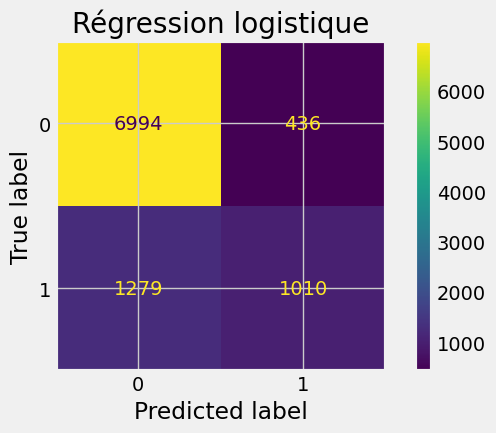

In [149]:
## Régression logistique
# logreg.fit(X_train_up, y_train_up)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix) 
disp.plot() 

plt.title('Régression logistique')
#recharger le module data_preprocessing
importlib.reload(data_preprocessing)
data_preprocessing.add_image(plt,"logreg")

Régression logistique + Lasso

Matrice de confusion:
[[7003  427]
 [1289 1000]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7430
           1       0.70      0.44      0.54      2289

    accuracy                           0.82      9719
   macro avg       0.77      0.69      0.71      9719
weighted avg       0.81      0.82      0.81      9719
 

Exactitude: 82.343863 



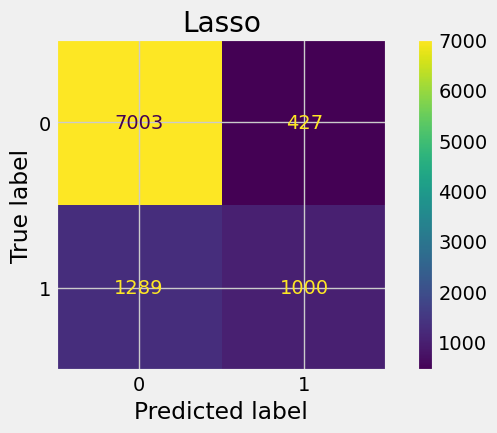

In [150]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.title('Lasso')

#recharger le module data_preprocessing
importlib.reload(data_preprocessing)
data_preprocessing.add_image(plt,"Lasso")






Régression logistique + Elastic Net

Matrice de confusion:
[[7005  425]
 [1286 1003]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7430
           1       0.70      0.44      0.54      2289

    accuracy                           0.82      9719
   macro avg       0.77      0.69      0.72      9719
weighted avg       0.81      0.82      0.81      9719
 

Exactitude: 82.395308 



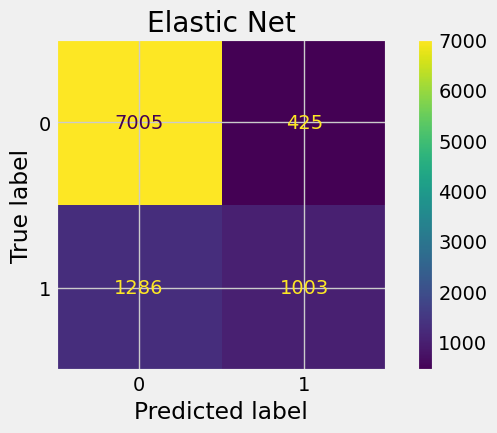

In [151]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.title('Elastic Net')

#recharger le module data_preprocessing
importlib.reload(data_preprocessing)
data_preprocessing.add_image(plt,"elastic_net")



# Modélisation prédictive avec  sur-échantillonnage de la classe minoritaire

In [112]:
!pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------------ --------------------------- 81.9/258.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [116]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

Régression logistique

Matrice de confusion:
[[5659 1771]
 [ 531 1758]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7430
           1       0.50      0.77      0.60      2289

    accuracy                           0.76      9719
   macro avg       0.71      0.76      0.72      9719
weighted avg       0.82      0.76      0.78      9719
 

Exactitude: 76.314436 



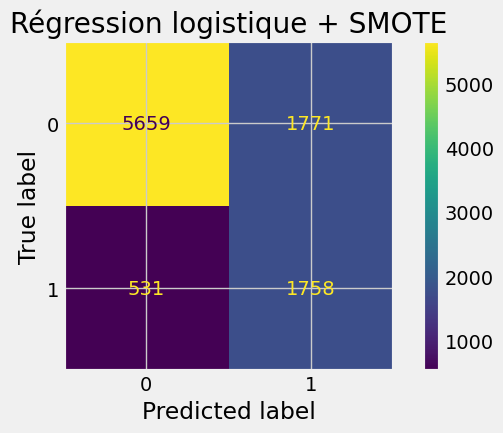

In [152]:
## Régression logistique avec SMOTE
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')

# Affichage et enregistrement de la matrice de confusion avec un titre
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.title('Régression logistique + SMOTE')

# Ajuster les marges pour que le titre soit complètement visible
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Enregistrer le schéma dans le dossier 'images'
plot_filename = '../images/logreg_SMOTE.png'
plt.savefig(plot_filename)  # Enregistre le schéma
plt.show()  # Affiche le schéma
plt.close()  # Ferme la figure pour éviter les conflits de figure



Régression logistique + Ridge

Matrice de confusion:
[[5639 1791]
 [ 530 1759]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7430
           1       0.50      0.77      0.60      2289

    accuracy                           0.76      9719
   macro avg       0.70      0.76      0.72      9719
weighted avg       0.82      0.76      0.78      9719
 

Exactitude: 76.118942 



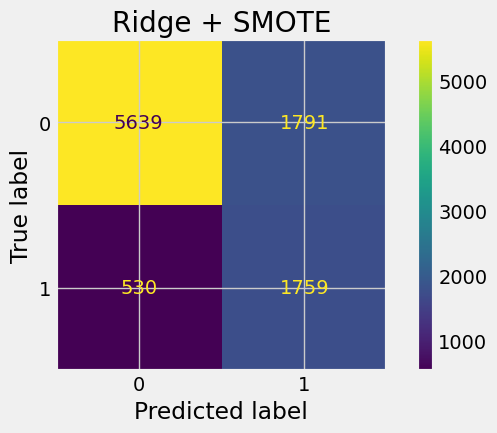

In [154]:
##  ridge + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
titre = 'Ridge + SMOTE'
disp.plot()
plt.title('Ridge + SMOTE')

#recharger le module data_preprocessing
importlib.reload(data_preprocessing)
data_preprocessing.add_image(plt,"Ridge_SMOTE")

On peut continuer à regarder les autres model + SMOTE.. (A revoir)

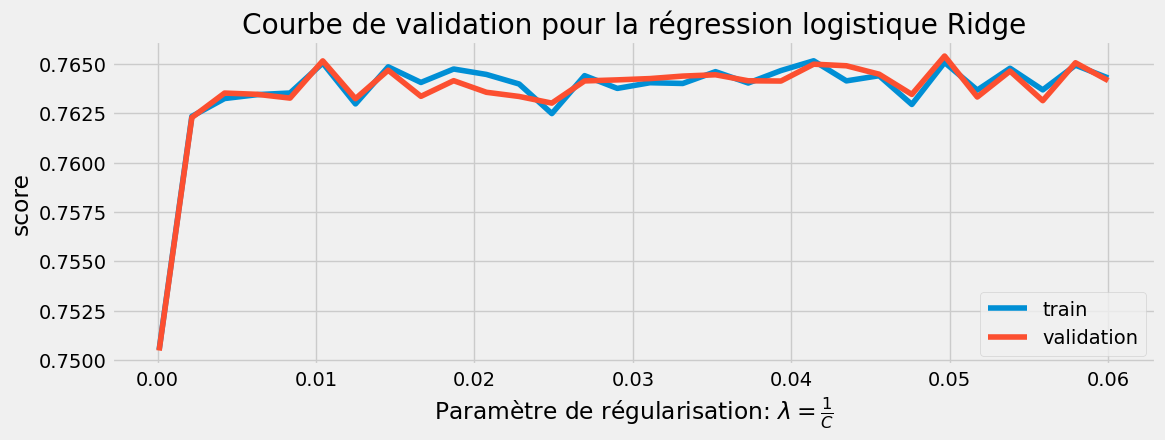

In [114]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregRidge, #LogisticRegression(), #logregRidge,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Ridge")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()